In [22]:
# Third-party
from astropy.constants import c
from astropy.table import Table, join
import astropy.coordinates as coord
import astropy.units as u
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('apw-notebook')
%matplotlib inline
import pandas as pd

In [85]:
ID_tbl = Table.read('../data/star_identifier.csv')
bensby_tbl = Table.read('../data/bensbyrv_bestunique.csv')
velocity_tbl = Table.read('../data/mdm-spring-2017/processed/velocity.fits')

In [86]:
len(velocity_tbl)

793

In [87]:
velocity_tbl.colnames

['object_name',
 'group_id',
 'smoh_index',
 'ra',
 'dec',
 'secz',
 'filename',
 'Ha_centroid',
 'Ha_centroid_err',
 'bary_rv_shift',
 'sky_shift_flag',
 'sky_wave_shift',
 'rv',
 'rv_err']

In [88]:
Halpha = 6562.8 * u.angstrom

(-5, 5)

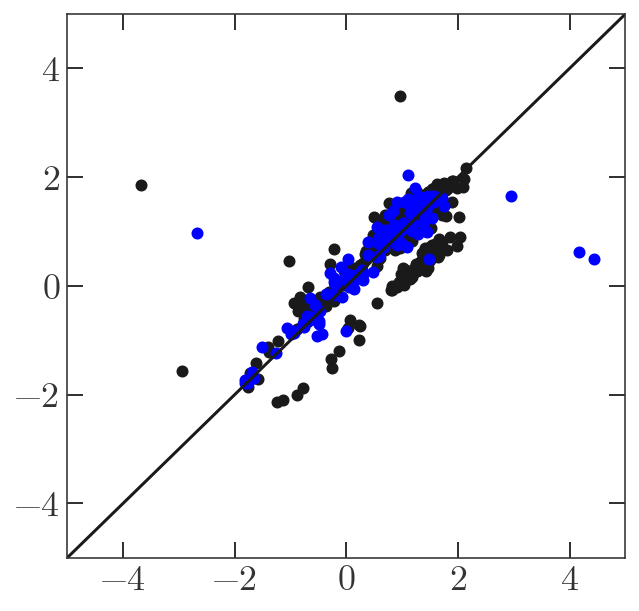

In [89]:
plt.figure(figsize=(5,5))
plt.plot([-5,5], [-5, 5], marker='', linestyle='-')
plt.scatter(velocity_tbl['sky_wave_shift'][:,1], velocity_tbl['sky_wave_shift'][:,0])
plt.scatter(velocity_tbl['sky_wave_shift'][:,2], velocity_tbl['sky_wave_shift'][:,1], color='b')
plt.xlim(-5, 5)
plt.ylim(-5, 5)

(6558, 6568)

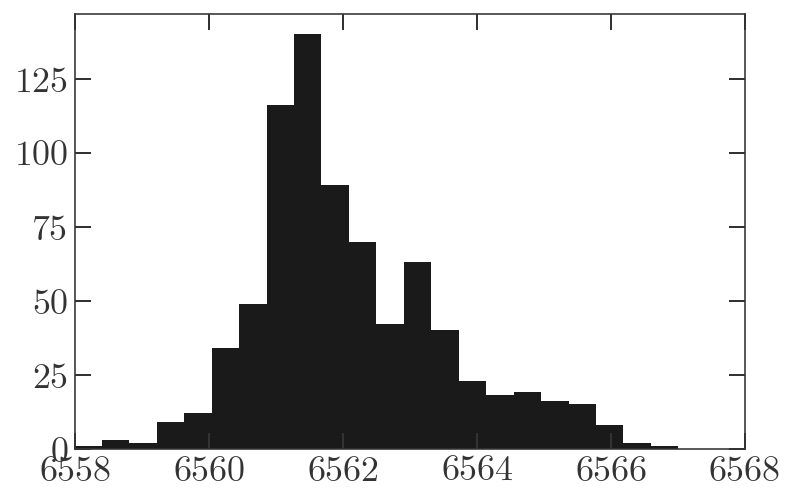

In [90]:
plt.hist(velocity_tbl['Ha_centroid'], bins='auto')
plt.xlim(6558, 6568)

(-60, 60)

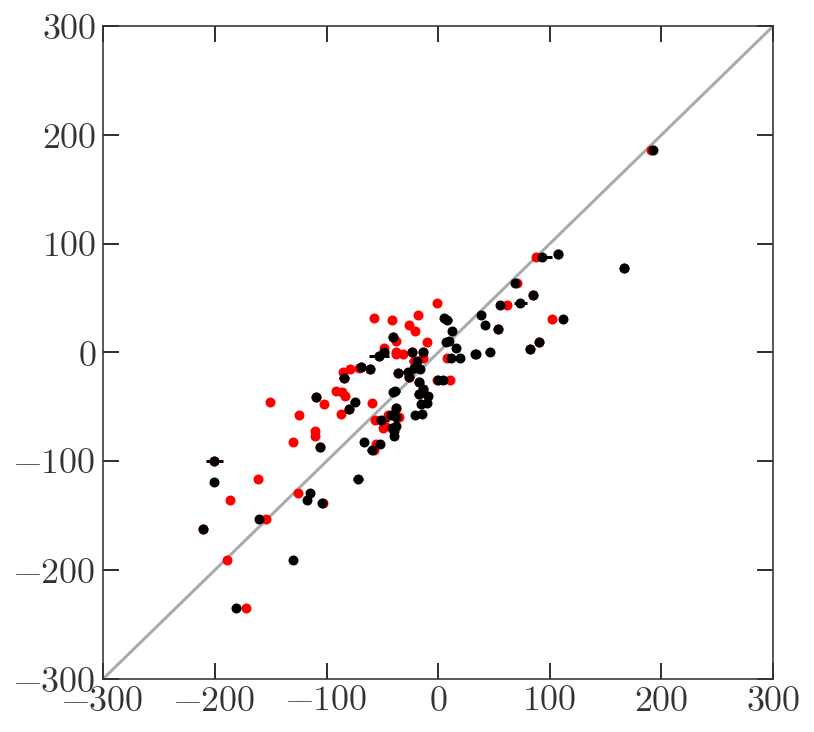

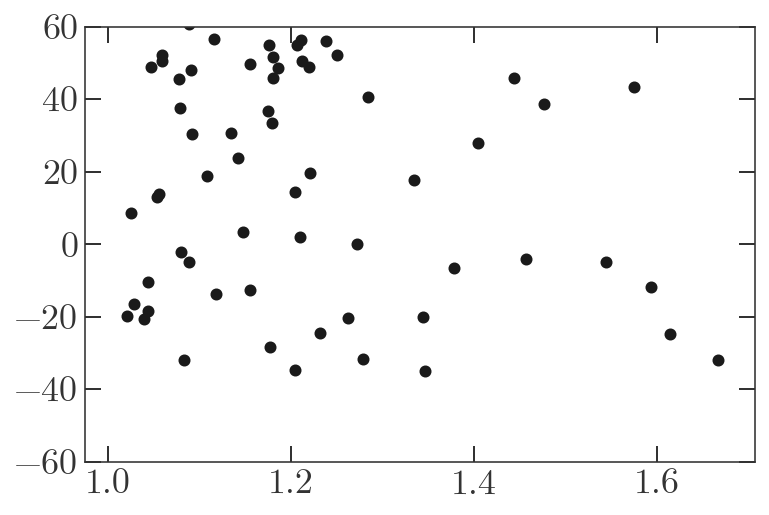

In [103]:
plt.figure(figsize=(6,6))

diffs = []
seczs = []
for row in velocity_tbl:
    name = row['object_name']
    bensby_row = bensby_tbl[bensby_tbl['OBJECT'] == name]
    
    if len(bensby_row) < 1:
        continue
        
    # -------------------------------------------------------------------
    flag = row['sky_shift_flag']
    
    if np.all(np.isnan(row['sky_wave_shift'][1:])):
        shift = 0. * u.angstrom
    
    else:
        shift = np.nanmean(row['sky_wave_shift'][1:], axis=-1) * u.angstrom

    if np.isnan(shift):
        shift = 0. * u.angstrom
    
#     shift = 0.5 * u.angstrom
    centroid = row['Ha_centroid'] * u.angstrom
    vbary = row['bary_rv_shift'] * u.km/u.s
    rv = (centroid + shift - Halpha) / Halpha * c.to(u.km/u.s) + vbary
    rv = rv.to(u.km/u.s).value
    # -------------------------------------------------------------------
    
    plt.errorbar(row['rv'], bensby_row['velValue'], xerr=row['rv_err'],
                 marker='o', color='k')
    plt.plot(rv, bensby_row['velValue'], 
             marker='o', color='r')
    
    diffs.append((bensby_row['velValue'] - rv)[0])
    seczs.append(row['secz'])
    
lim = 300
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

_grid = np.linspace(-lim, lim, 256)

plt.plot(_grid, _grid, marker='', color='#aaaaaa', zorder=-10)

plt.figure()
plt.scatter(seczs, diffs)
plt.ylim(-60, 60)

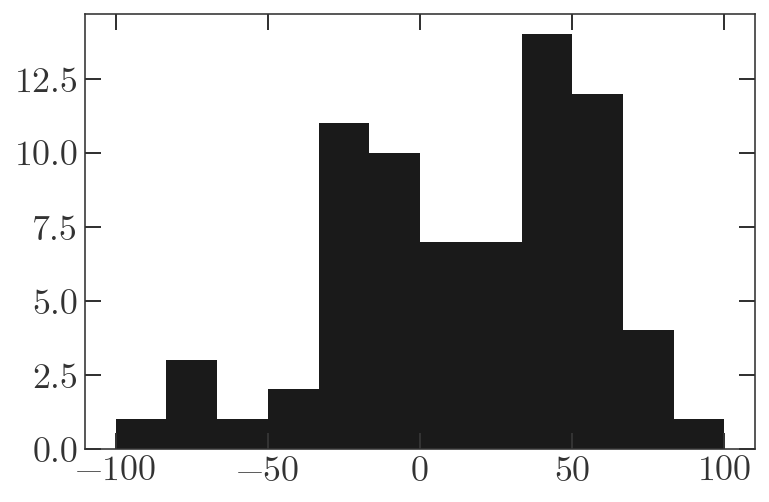

In [76]:
plt.hist(diffs, bins=np.linspace(-100, 100, 13));

In [77]:
1.5 * np.median(np.abs(diffs - np.median(diffs)))

48.482111537233202

In [14]:
plt.figure(figsize=(6,6))
diffs = []
for row in velocity_tbl: # [velocity_tbl['sky_shift_flag'] == 0]:
    name = row['object_name']
    bensby_row = bensby_tbl[bensby_tbl['OBJECT'] == name]
    
    if len(bensby_row) < 1:
        continue
    
    sky_shift = np.nanmean(row['sky_rv_shift'])
    sky_shift = row['sky_rv_shift'][1]  
    if np.isnan(sky_shift):
        sky_shift = 0.
        
    # sky_shift = 0.
    
    rv_corrected = row['raw_rv'] + row['bary_rv_shift'] + sky_shift + row['bary_rv_shift']
    plt.errorbar([rv, rv-sky_shift], [bensby_row['velValue']]*2,
                 xerr=[row['rv_precision']]*2, marker='')
    plt.plot(rv, bensby_row['velValue'], 
             marker='o', color='r')
    plt.plot(rv-sky_shift, bensby_row['velValue'],
             marker='o', color='g')
    
    diffs.append(float(rv - bensby_row['velValue']))
    
lim = 300
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

_grid = np.linspace(-lim, lim, 256)

plt.plot(_grid, _grid, marker='')

# difference hist
plt.figure()
plt.hist(diffs, bins=np.linspace(-150,150,32));
plt.xlim()

ERROR: KeyError: 'sky_rv_shift' [astropy.table.table]


KeyError: 'sky_rv_shift'

In [91]:
diffs = np.array(diffs)
1.48 * np.median(np.abs(diffs[np.isfinite(diffs)] - np.median(diffs[np.isfinite(diffs)])))

40.943250094606697

In [63]:
np.median(diffs)

40.392344413343473